In [1]:
# Load libraries
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
# Set style (needs to be in a new cell)
set_default()

In [3]:
device = torch.device("gpu:0" if torch.cuda.is_available() else "cpu")

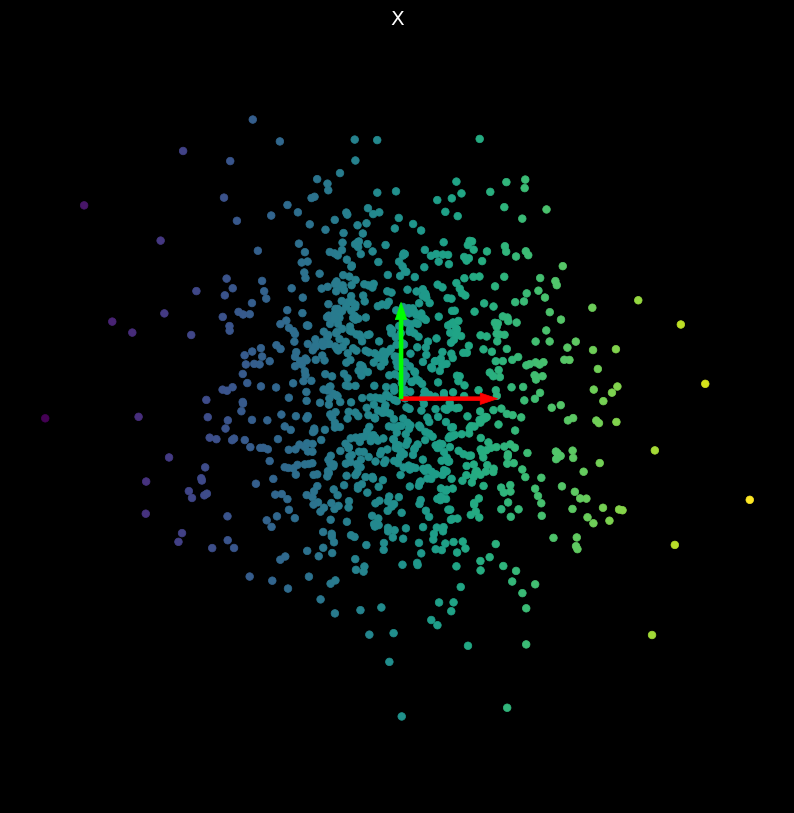

In [4]:
# generate some points in 2D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

In [5]:
OI.size()

torch.Size([4, 2])

### Visualize Linear Transformation

- Generate a random matrix $W$
$$W = U \begin{bmatrix} 
s1 & 0 \\
0 & s2
\end{bmatrix} V^{\top}$$

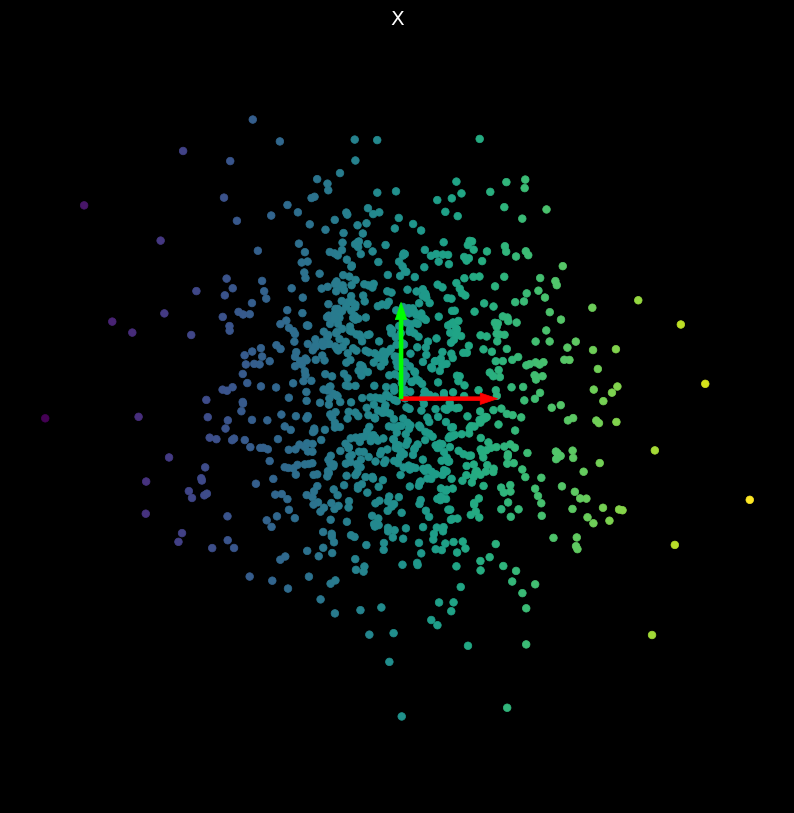

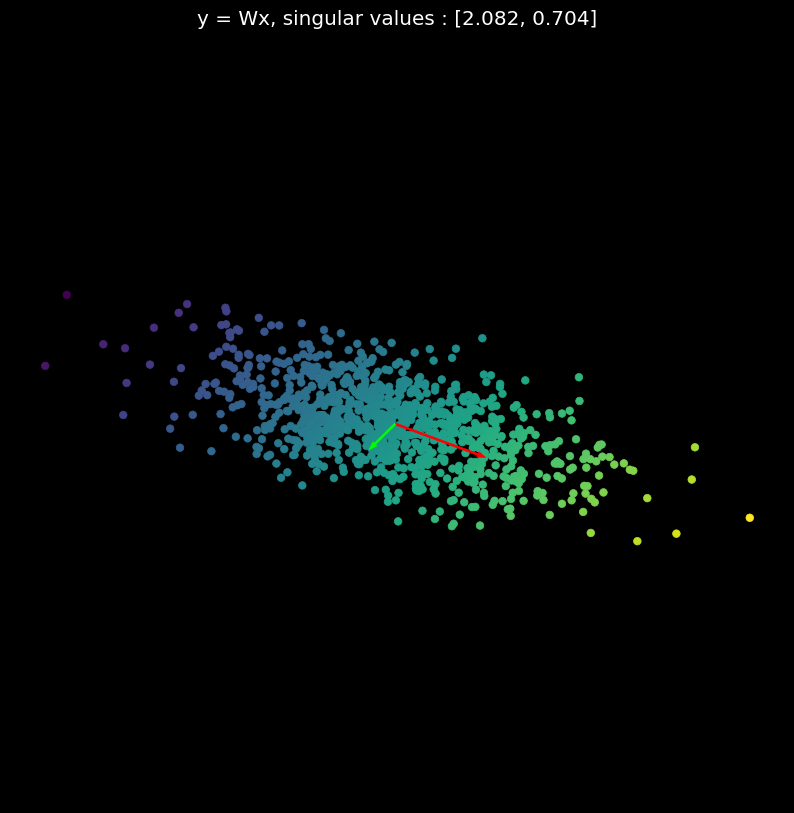

In [6]:

show_scatterplot(X, colors, title='X')
plot_bases(OI)

# create a random matrix
W = torch.randn(2, 2).to(device)
# transform points
Y = X @ W.t()
# compute singular values
U, S, V = torch.svd(W)
# plot transformed points
show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
# transform the basis
new_OI = OI @ W.t()
# plot old and new basis
# plot_bases(OI)
plot_bases(new_OI)

### Linear Transformation with nn module

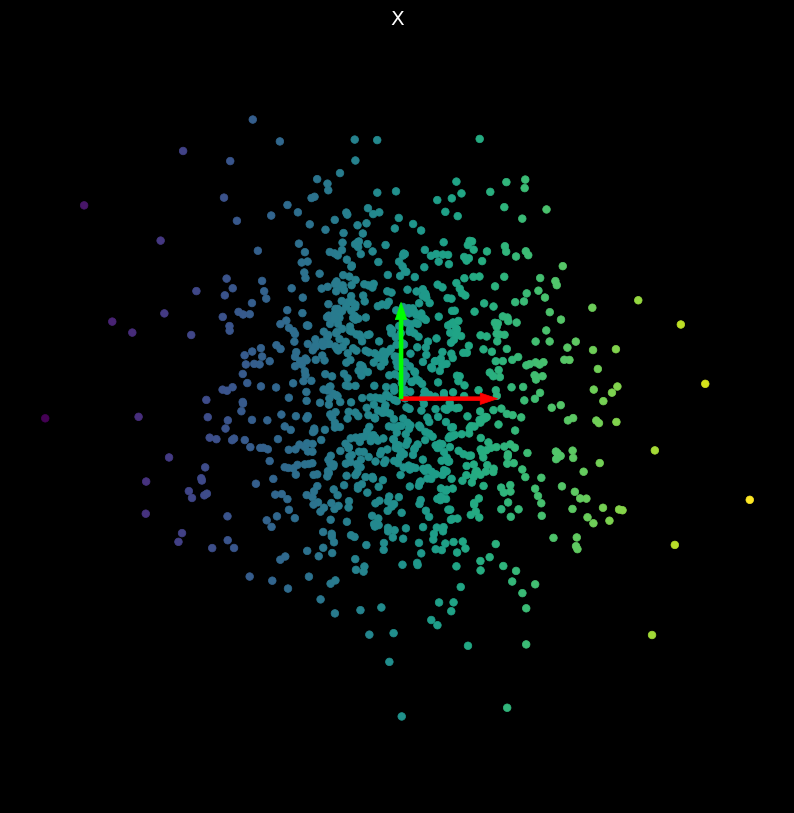

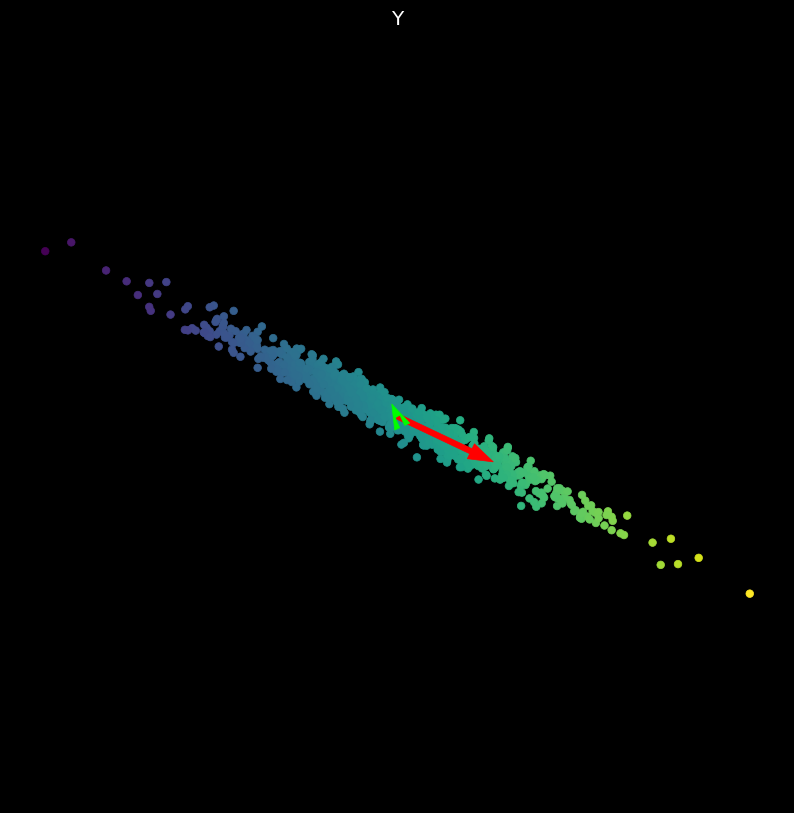

In [23]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)
model = nn.Sequential(
    nn.Linear(2, 2, bias=True)
)
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors, title='Y')
    plot_bases(model(OI))

### Non-linear Transformation

Text(0.5, 1.0, 'tanh function')

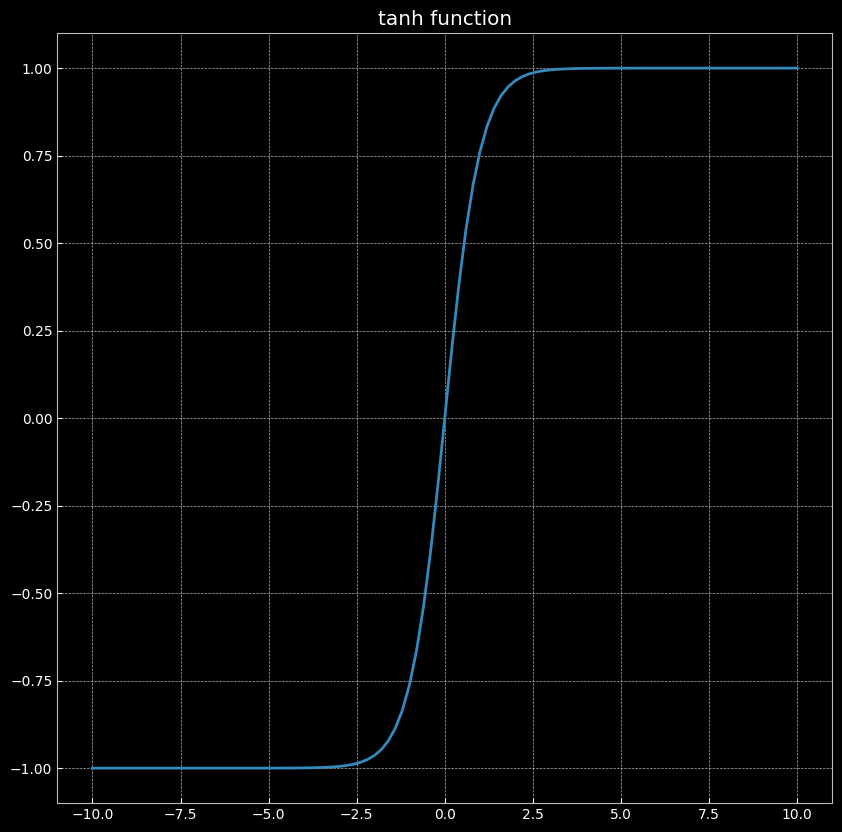

In [26]:
# Tanh
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())
title("tanh function")

Text(0.5, 1.0, 'ReLU function')

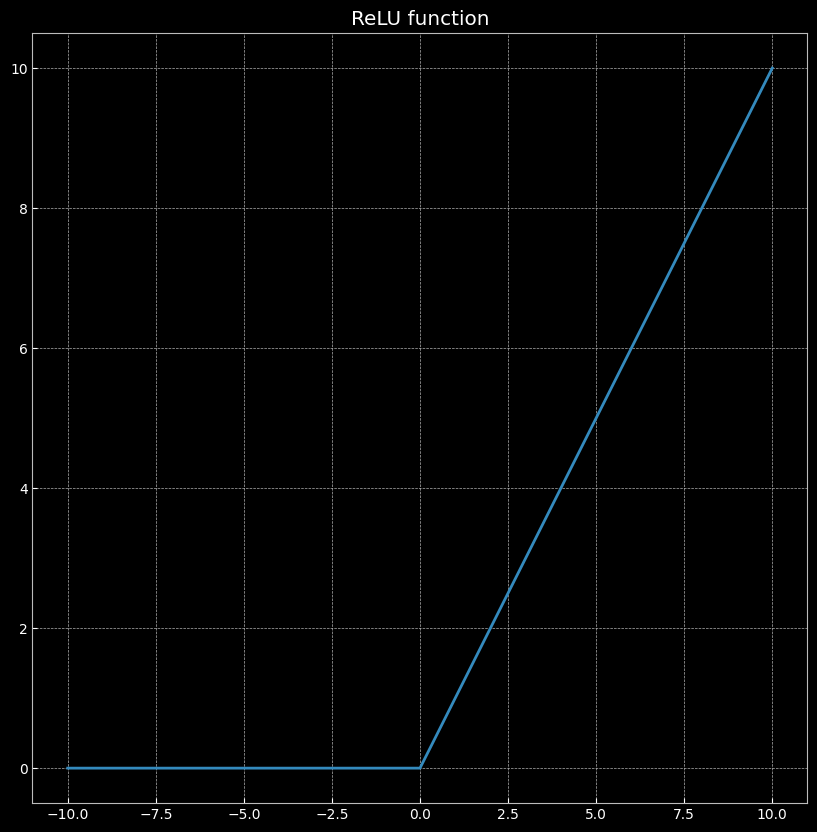

In [27]:
# ReLU (Rectified Linear Unit
s = torch.relu(z)
plot(z.numpy(), s.numpy())
title("ReLU function")

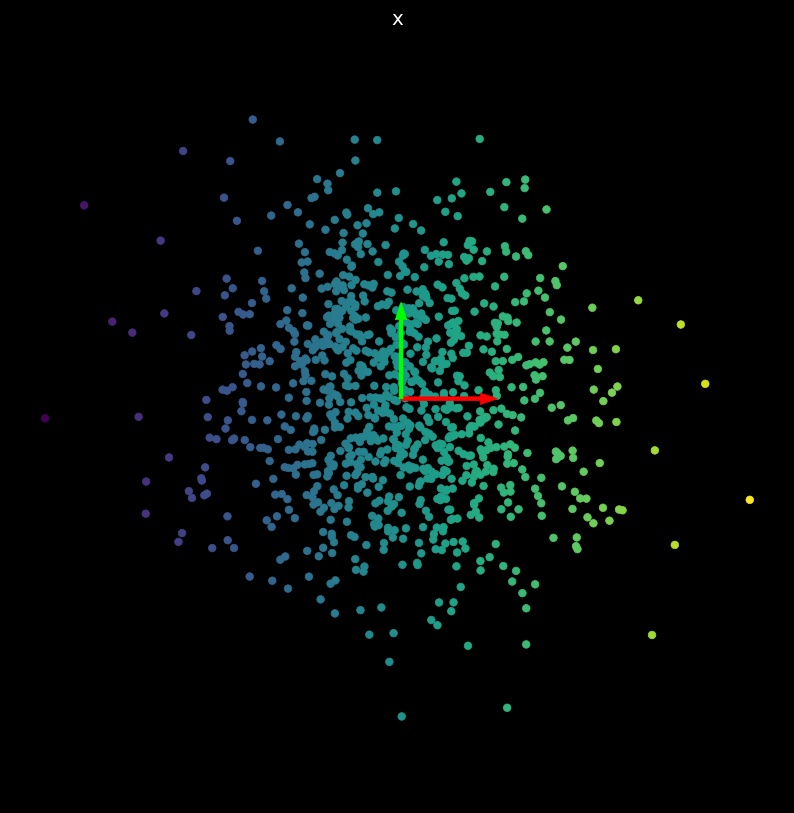

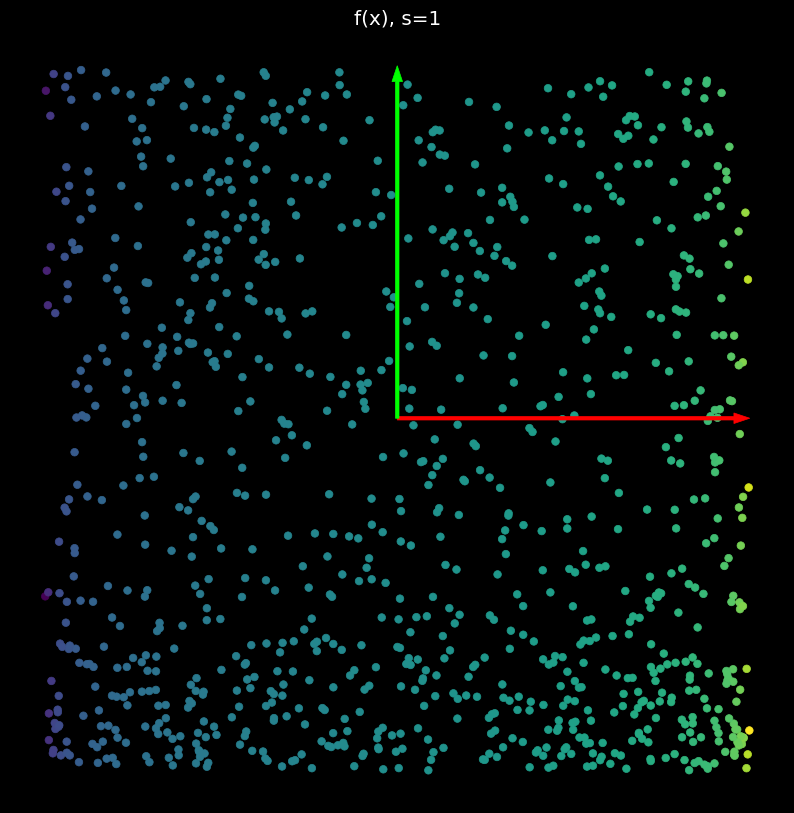

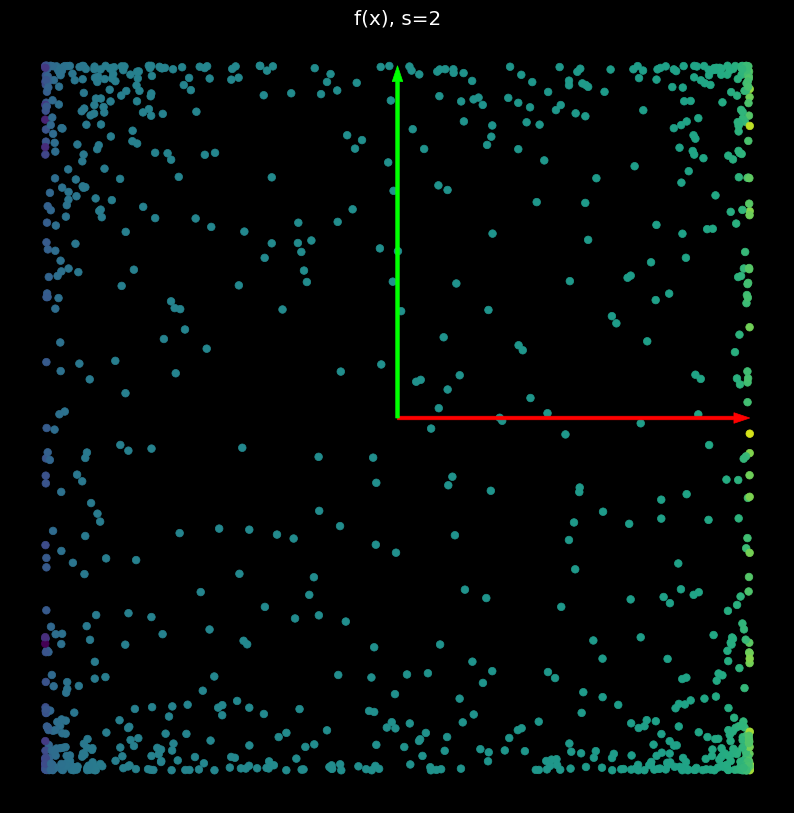

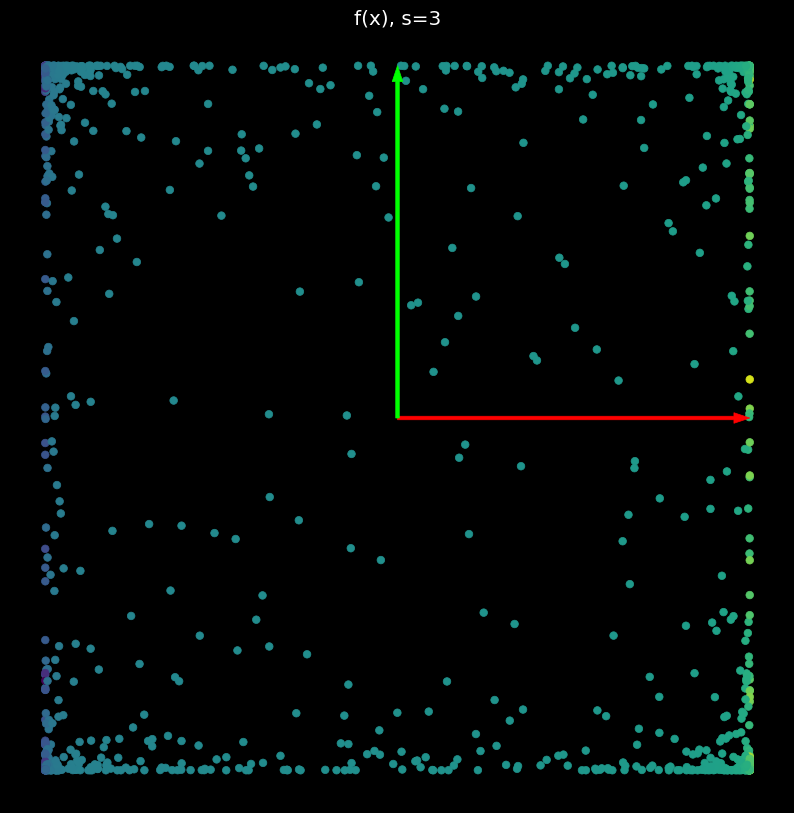

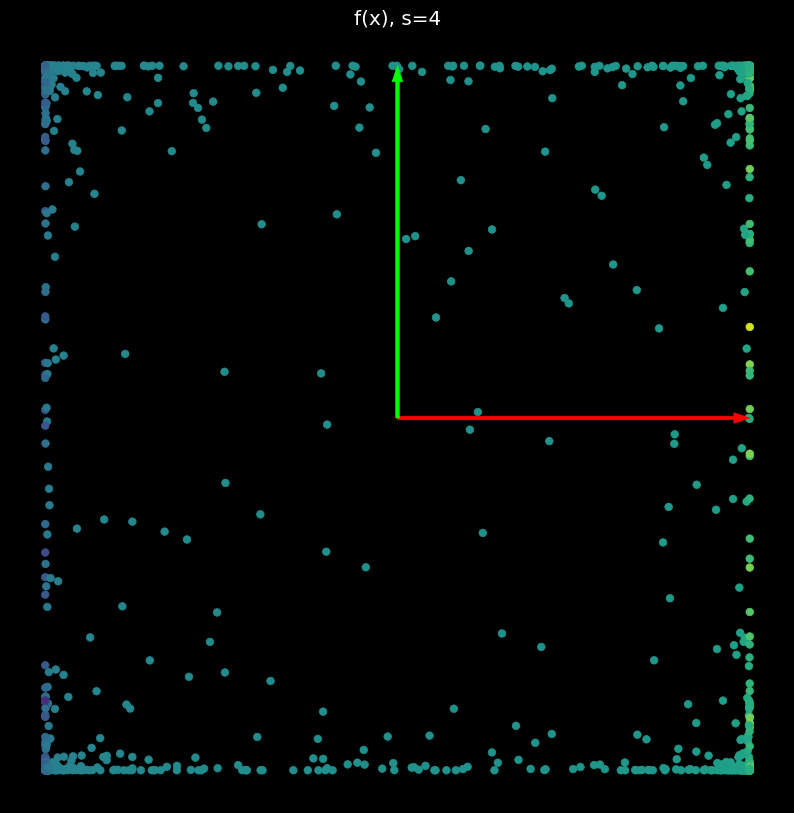

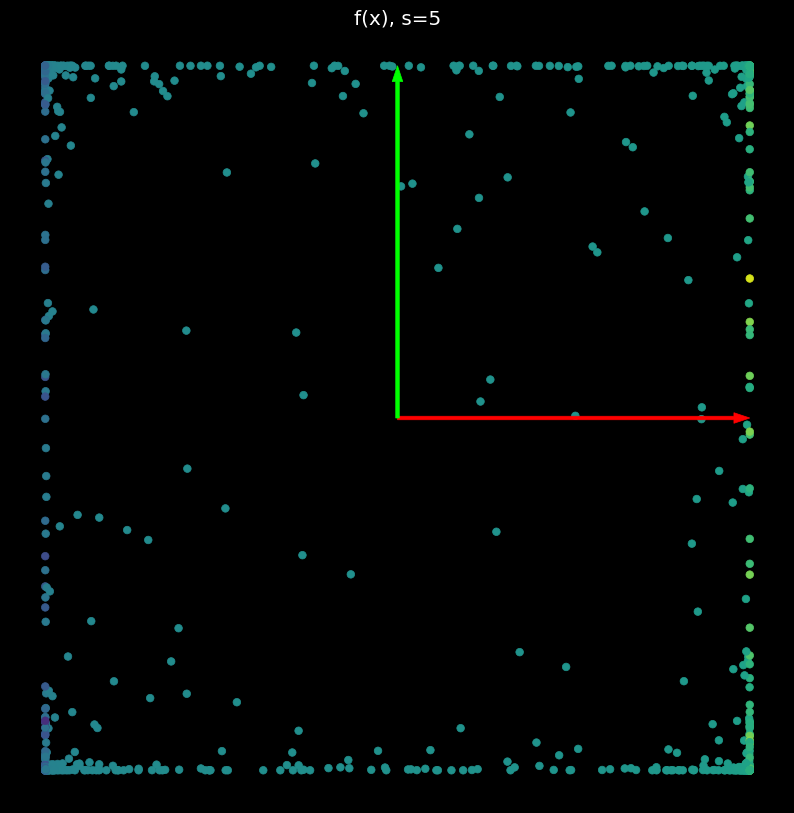

In [43]:
show_scatterplot(X, colors, title="x")
plot_bases(OI)

model = nn.Sequential(
    nn.Linear(2, 2, bias=True),
    nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)